# Ordinary differential equations with Python


## Example 1 - Simple ODE

$$
\dot{x} = Ax
$$

where $\dot{x} = \frac{dx}{dt}, A = \frac{-1}{T}$

The solution is:
$$
x = e^{-At}x_0
$$

In [4]:
# import the dependencies
import numpy as np
import matplotlib.pyplot as plt
import math 

In [1]:
from scipy.integrate import odeint

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

[[1.        ]
 [0.81873077]
 [0.67032006]
 [0.54881165]
 [0.44932898]
 [0.36787947]
 [0.30119421]
 [0.24659696]
 [0.20189652]
 [0.16529888]
 [0.13533527]
 [0.11080315]
 [0.09071794]
 [0.07427357]
 [0.06081005]
 [0.04978706]
 [0.0407622 ]
 [0.03337327]
 [0.02732372]
 [0.02237077]
 [0.01831564]
 [0.01499558]
 [0.01227734]
 [0.01005184]
 [0.00822975]]


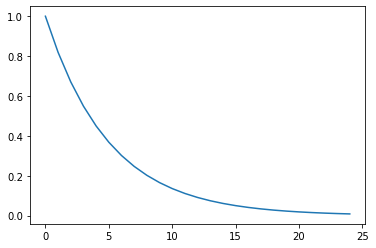

In [5]:
# Example 1

# Parameters
T = 5
A = -1/T

x0 = 1
tstart = 0
tend = 25
t = np.arange(tstart, tend, 1)
x0 = 1

# Return the differential
def derivative_p1(x, t, a):
    dx_dt = a*x
    return dx_dt

# Solve the ODE
x = odeint(derivative_p1, x0, t, args=(A,))
print(x)

# Plot the ODE
plt.plot(t, x)